In [26]:
## all imports
from IPython.display import HTML
import pandas as pd
import numpy as np
import urllib
import pickle
import bs4
import time
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib.request.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)

In [3]:
bs_tree.findAll(id = 'searchCountPages')

[<div id="searchCountPages">
                     Page 1 of 11,398 jobs</div>]

In [4]:
int("".join([i for i in bs_tree.find(id = 'searchCountPages').contents[0].strip().split()[3].split(',')]))

11398

In [5]:
job_count = int("".join([i for i in bs_tree.find(id = 'searchCountPages').contents[0].strip().split()[3].split(',')]))

In [6]:
job_count

11398

In [7]:
indeedHomeUrl = 'https://www.indeed.com/viewjob?'

In [8]:
url = 'http://www.indeed.com/jobs?q=data+scientist&start=0'
html_page = urllib.request.urlopen(url).read() 
bs_tree = bs4.BeautifulSoup(html_page)
a = [indeedHomeUrl + i.get('href')[8:] for i in bs_tree.findAll('a') if i.get('class') is not None and 'jobtitle' in i.get('class') and i.get('href')[:7] == "/rc/clk"]

In [9]:
b = [indeedHomeUrl + i.get('href')[8:] for i in bs_tree.findAll('a') if i.get('class') is not None and 'jobtitle' in i.get('class') and i.get('href')[:7] == "/rc/clk"]

In [10]:
a[:]

['https://www.indeed.com/viewjob?jk=bd2d32a1e6455d95&fccid=734cb5a01ee60f80&vjs=3',
 'https://www.indeed.com/viewjob?jk=d7c01531f284eae6&fccid=d723225da214c842&vjs=3',
 'https://www.indeed.com/viewjob?jk=28fa52802a412b68&fccid=f1374be6a45f4b8a&vjs=3',
 'https://www.indeed.com/viewjob?jk=72faf98781d003d1&fccid=fe2d21eef233e94a&vjs=3',
 'https://www.indeed.com/viewjob?jk=b05c3418bd470d33&fccid=25b5166547bbf543&vjs=3',
 'https://www.indeed.com/viewjob?jk=466f2e0217407187&fccid=5570e8fef528b267&vjs=3',
 'https://www.indeed.com/viewjob?jk=ae16135f6b70d18c&fccid=510aa29fcf8f87d9&vjs=3',
 'https://www.indeed.com/viewjob?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3',
 'https://www.indeed.com/viewjob?jk=4f803d58e9f7e8c6&fccid=d6ef41e202aa2c0b&vjs=3',
 'https://www.indeed.com/viewjob?jk=60ca99bf7f8b5564&fccid=6dd2b85b361af592&vjs=3',
 'https://www.indeed.com/viewjob?jk=cbe04dd42f334a0b&fccid=6374759aed463ee1&vjs=3']

In [14]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/15.0))
print(f"Num Pages: {num_pages}")
base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    print(f"Num Page: {i}")
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    print(f"URL: {url}")
    html_page = urllib.request.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    pageJobLinks = [indeedHomeUrl + i.get('href')[8:] for i in bs_tree.findAll('a') if i.get('class') is not None and 'jobtitle' in i.get('class') and i.get('href')[:7] == "/rc/clk"]
    for link in pageJobLinks:
        job_links.append(link)

    time.sleep(1)

print( "We found a lot of jobs: ", len(job_links))

Num Pages: 760
Num Page: 0
URL: http://www.indeed.com/jobs?q=data+scientist&start=0
Num Page: 1
URL: http://www.indeed.com/jobs?q=data+scientist&start=10
Num Page: 2
URL: http://www.indeed.com/jobs?q=data+scientist&start=20
Num Page: 3
URL: http://www.indeed.com/jobs?q=data+scientist&start=30
Num Page: 4
URL: http://www.indeed.com/jobs?q=data+scientist&start=40
Num Page: 5
URL: http://www.indeed.com/jobs?q=data+scientist&start=50
Num Page: 6
URL: http://www.indeed.com/jobs?q=data+scientist&start=60
Num Page: 7
URL: http://www.indeed.com/jobs?q=data+scientist&start=70
Num Page: 8
URL: http://www.indeed.com/jobs?q=data+scientist&start=80
Num Page: 9
URL: http://www.indeed.com/jobs?q=data+scientist&start=90
Num Page: 10
URL: http://www.indeed.com/jobs?q=data+scientist&start=100
Num Page: 11
URL: http://www.indeed.com/jobs?q=data+scientist&start=110
Num Page: 12
URL: http://www.indeed.com/jobs?q=data+scientist&start=120
Num Page: 13
URL: http://www.indeed.com/jobs?q=data+scientist&start=13

In [15]:
# Save the scraped links
with open('scraped_links.pkl', 'wb') as f:
    pickle.dump(job_links, f)
    
# Read canned scraped links
with open('scraped_links.pkl', 'rb') as f:
    job_links = pickle.load(f)    

In [16]:
for i in job_links:
    print(i)

https://www.indeed.com/viewjob?jk=bd2d32a1e6455d95&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/viewjob?jk=d7c01531f284eae6&fccid=d723225da214c842&vjs=3
https://www.indeed.com/viewjob?jk=28fa52802a412b68&fccid=f1374be6a45f4b8a&vjs=3
https://www.indeed.com/viewjob?jk=72faf98781d003d1&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/viewjob?jk=b05c3418bd470d33&fccid=25b5166547bbf543&vjs=3
https://www.indeed.com/viewjob?jk=466f2e0217407187&fccid=5570e8fef528b267&vjs=3
https://www.indeed.com/viewjob?jk=ae16135f6b70d18c&fccid=510aa29fcf8f87d9&vjs=3
https://www.indeed.com/viewjob?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3
https://www.indeed.com/viewjob?jk=4f803d58e9f7e8c6&fccid=d6ef41e202aa2c0b&vjs=3
https://www.indeed.com/viewjob?jk=60ca99bf7f8b5564&fccid=6dd2b85b361af592&vjs=3
https://www.indeed.com/viewjob?jk=cbe04dd42f334a0b&fccid=6374759aed463ee1&vjs=3
https://www.indeed.com/viewjob?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3
https://www.indeed.com/viewjob?jk=4f803d

In [17]:
skill_set = {'Python': 0, 'Scala': 0, 'Java': 0}    

#### Parsing the above links to search for above skill sets 

In [21]:
for job_link in job_links[:50]:
    
    #bs_tree = bs4.BeautifulSoup(html_page)
    print(f"Parsing link: {job_link}")
    try:
        html_text = urllib.request.urlopen(job_link).read().decode("utf-8") 
        html_text = re.sub("[,.;@#?!&$]+"," ", html_text)
    except Exception as e:
        print(str(e))
    
    for key in skill_set.keys():
        if key in html_text:
            skill_set[key] += 1
    

Parsing link: https://www.indeed.com/viewjob?jk=bd2d32a1e6455d95&fccid=734cb5a01ee60f80&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=d7c01531f284eae6&fccid=d723225da214c842&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=28fa52802a412b68&fccid=f1374be6a45f4b8a&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=72faf98781d003d1&fccid=fe2d21eef233e94a&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=b05c3418bd470d33&fccid=25b5166547bbf543&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=466f2e0217407187&fccid=5570e8fef528b267&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=ae16135f6b70d18c&fccid=510aa29fcf8f87d9&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=4f803d58e9f7e8c6&fccid=d6ef41e202aa2c0b&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=60ca99bf7f8b5564&fccid=6dd2b85b361af592&vjs=3
Parsing link: https://www.indeed.com/viewjob?jk=cbe04dd42f33

In [24]:
skill_set

{'Python': 100, 'Scala': 8, 'Java': 6}

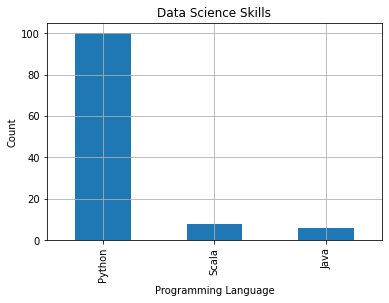

In [27]:
pseries = pd.Series(skill_set)
#pseries.sort(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.grid(True)
plt.show()